In [9]:
import numpy as np
import pandas as pd
import os
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define AAL Brain Regions
original_labels = [
    "Precentral_L", "Precentral_R", "Frontal_Sup_L", "Frontal_Sup_R",
    "Frontal_Sup_Orb_L", "Frontal_Sup_Orb_R", "Frontal_Mid_L", "Frontal_Mid_R",
    "Frontal_Mid_Orb_L", "Frontal_Mid_Orb_R", "Frontal_Inf_Oper_L", "Frontal_Inf_Oper_R",
    "Frontal_Inf_Tri_L", "Frontal_Inf_Tri_R", "Frontal_Inf_Orb_L", "Frontal_Inf_Orb_R",
    "Rolandic_Oper_L", "Rolandic_Oper_R", "Supp_Motor_Area_L", "Supp_Motor_Area_R",
    "Olfactory_L", "Olfactory_R", "Frontal_Sup_Medial_L", "Frontal_Sup_Medial_R",
    "Frontal_Mid_Orb_L", "Frontal_Mid_Orb_R", "Rectus_L", "Rectus_R", "Insula_L", "Insula_R",
    "Cingulum_Ant_L", "Cingulum_Ant_R", "Cingulum_Mid_L", "Cingulum_Mid_R",
    "Cingulum_Post_L", "Cingulum_Post_R", "Hippocampus_L", "Hippocampus_R",
    "ParaHippocampal_L", "ParaHippocampal_R", "Amygdala_L", "Amygdala_R",
    "Calcarine_L", "Calcarine_R", "Cuneus_L", "Cuneus_R", "Lingual_L", "Lingual_R",
    "Occipital_Sup_L", "Occipital_Sup_R", "Occipital_Mid_L", "Occipital_Mid_R",
    "Occipital_Inf_L", "Occipital_Inf_R", "Fusiform_L", "Fusiform_R",
    "Postcentral_L", "Postcentral_R", "Parietal_Sup_L", "Parietal_Sup_R",
    "Parietal_Inf_L", "Parietal_Inf_R", "SupraMarginal_L", "SupraMarginal_R",
    "Angular_L", "Angular_R", "Precuneus_L", "Precuneus_R",
    "Paracentral_Lobule_L", "Paracentral_Lobule_R", "Caudate_L", "Caudate_R",
    "Putamen_L", "Putamen_R", "Pallidum_L", "Pallidum_R", "Thalamus_L", "Thalamus_R",
    "Heschl_L", "Heschl_R", "Temporal_Sup_L", "Temporal_Sup_R",
    "Temporal_Pole_Sup_L", "Temporal_Pole_Sup_R", "Temporal_Mid_L", "Temporal_Mid_R",
    "Temporal_Pole_Mid_L", "Temporal_Pole_Mid_R", "Temporal_Inf_L", "Temporal_Inf_R"
]


# Define Anatomical Groups
anatomical_groups = {
    "Cingulate": ["Cingulum_Ant_L", "Cingulum_Ant_R", "Cingulum_Mid_L", "Cingulum_Mid_R", "Cingulum_Post_L", "Cingulum_Post_R"],
    "Frontal": ["Frontal_Sup_L", "Frontal_Sup_R", "Frontal_Sup_Orb_L", "Frontal_Sup_Orb_R",
                "Frontal_Mid_L", "Frontal_Mid_R", "Frontal_Mid_Orb_L", "Frontal_Mid_Orb_R",
                "Frontal_Inf_Oper_L", "Frontal_Inf_Oper_R", "Frontal_Inf_Tri_L", "Frontal_Inf_Tri_R",
                "Frontal_Inf_Orb_L", "Frontal_Inf_Orb_R", "Supp_Motor_Area_L", "Supp_Motor_Area_R",
                "Olfactory_L", "Olfactory_R", "Frontal_Sup_Medial_L", "Frontal_Sup_Medial_R", "Rectus_L", "Rectus_R"],
    "Limbic": ["Hippocampus_L", "Hippocampus_R", "ParaHippocampal_L", "ParaHippocampal_R", "Amygdala_L", "Amygdala_R"],
    "Occipital": ["Calcarine_L", "Calcarine_R", "Cuneus_L", "Cuneus_R", "Lingual_L", "Lingual_R",
                  "Occipital_Sup_L", "Occipital_Sup_R", "Occipital_Mid_L", "Occipital_Mid_R",
                  "Occipital_Inf_L", "Occipital_Inf_R", "Fusiform_L", "Fusiform_R"],
    "Parietal": ["Parietal_Sup_L", "Parietal_Sup_R", "Parietal_Inf_L", "Parietal_Inf_R",
                 "SupraMarginal_L", "SupraMarginal_R", "Angular_L", "Angular_R",
                 "Precuneus_L", "Precuneus_R", "Paracentral_Lobule_L", "Paracentral_Lobule_R"],
    "Sensorimotor": ["Precentral_L", "Precentral_R", "Postcentral_L", "Postcentral_R", "Rolandic_Oper_L", "Rolandic_Oper_R"],
    "Subcortical": ["Caudate_L", "Caudate_R", "Putamen_L", "Putamen_R", "Pallidum_L", "Pallidum_R", "Thalamus_L", "Thalamus_R"],
    "Temporal": ["Insula_L", "Insula_R", "Heschl_L", "Heschl_R", "Temporal_Sup_L", "Temporal_Sup_R",
                 "Temporal_Pole_Sup_L", "Temporal_Pole_Sup_R", "Temporal_Mid_L", "Temporal_Mid_R",
                 "Temporal_Pole_Mid_L", "Temporal_Pole_Mid_R", "Temporal_Inf_L", "Temporal_Inf_R"]
}


In [5]:

# Reorder the Connectivity Matrix
def reorder_matrix(original_labels, anatomical_groups, connectivity_matrix):
    new_order = []
    new_order_labels = []

    # Assign regions to their anatomical groups
    for group_name, group_regions in anatomical_groups.items():
        for region in group_regions:
            if region in original_labels and region not in new_order:
                new_order.append(region)
                new_order_labels.append(group_name)

    # Add any remaining regions not in an anatomical group
    for region in original_labels:
        if region not in new_order:
            new_order.append(region)
            new_order_labels.append("Other")

    # Find the indices of new_order regions in original_labels
    indices = [original_labels.index(region) for region in new_order]

    # Reorder the connectivity matrix based on the new order
    reordered_matrix = connectivity_matrix[np.ix_(indices, indices)]

    return reordered_matrix, new_order, new_order_labels

### Apply Reordering to CC

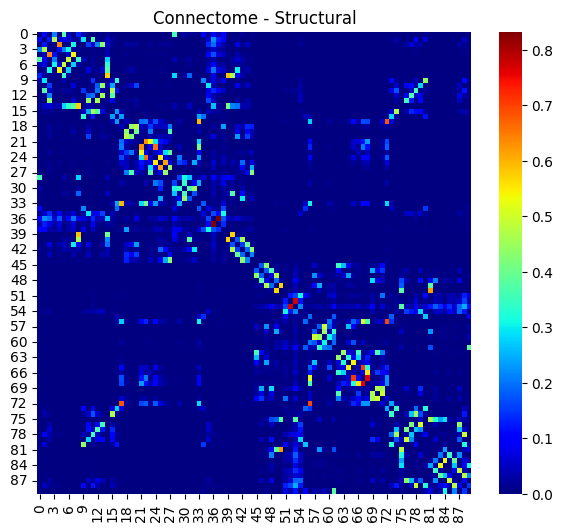

In [10]:
# Import the atlas
data_path= "C:/Users/diego/Desktop/phase_coherance_consciousness/data"
data_connectome = os.path.join(data_path, "./structural.mat")
CC = loadmat(data_connectome)['A']

# Plot it
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(CC, cmap='jet',cbar=True, ax=ax)
ax.set_title(f"Connectome - Structural")
plt.show()

In [16]:
CC_reordered, new_labels, new_group_labels = reorder_matrix(original_labels, anatomical_groups, CC)

df = pd.DataFrame(CC_reordered, index=new_labels, columns=new_labels)
df["Group"] = new_group_labels
df.head()

,Cingulum_Ant_L,Cingulum_Ant_R,Cingulum_Mid_L,Cingulum_Mid_R,Cingulum_Post_L,Cingulum_Post_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,...,Temporal_Sup_R,Temporal_Pole_Sup_L,Temporal_Pole_Sup_R,Temporal_Mid_L,Temporal_Mid_R,Temporal_Pole_Mid_L,Temporal_Pole_Mid_R,Temporal_Inf_L,Temporal_Inf_R,Group
Cingulum_Ant_L,0.000000,0.364909,0.447285,0.003396,0.000000,0.000000,0.0,0.002057,0.00000,0.009036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Cingulate
Cingulum_Ant_R,0.364909,0.000000,0.172070,0.006958,0.000000,0.000000,0.0,0.000000,0.00084,0.021055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Cingulate
Cingulum_Mid_L,0.447285,0.172070,0.000000,0.002129,0.000000,0.000000,0.0,0.000702,0.00039,0.004731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Cingulate
Cingulum_Mid_R,0.003396,0.006958,0.002129,0.000000,0.178258,0.005520,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Cingulate
Cingulum_Post_L,0.000000,0.000000,0.000000,0.178258,0.000000,0.073147,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007427,0.011651,Cingulate
